In [ ]:
#Group 4
#CSE437 Section 2
#Name: Nafis Chowdhury Id:21101034
#Name: Anika Ahmed Id:21101029
#Name: Moinul Haque Id:21101186
#Name: Mujtaba Wasif Pritom Id:20201130

Reading the brain stroke dataset

In [ ]:
import pandas as pd
stroke = pd.read_csv('brain_stroke.csv')
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Exploring the features of dataset and the data type each column have

In [ ]:
stroke.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Information on Stroke dataset

In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4982 non-null   object 
 1   age                4984 non-null   float64
 2   hypertension       4984 non-null   int64  
 3   heart_disease      4984 non-null   int64  
 4   ever_married       4983 non-null   object 
 5   work_type          4982 non-null   object 
 6   Residence_type     4983 non-null   object 
 7   avg_glucose_level  4983 non-null   float64
 8   bmi                4982 non-null   float64
 9   smoking_status     4983 non-null   object 
 10  stroke             4984 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.4+ KB


Dimension of the dataset

In [ ]:
stroke.shape

(4984, 11)

Exploring the rows which have null values

In [ ]:
null_rows = stroke[stroke.isnull().any(axis=1)]

print("Rows with Null Values:")
print(null_rows)


Rows with Null Values:
      gender   age  hypertension  heart_disease ever_married      work_type  \
223      NaN  44.0             0              0          Yes       Govt_job   
342      NaN  26.0             0              0          Yes        Private   
883     Male  75.0             1              1          Yes  Self-employed   
987     Male  27.0             0              0           No        Private   
3508    Male  80.0             0              0          Yes  Self-employed   
3593  Female  45.0             0              0          Yes       Govt_job   
4544  Female  49.0             0              0          NaN        Private   
4565  Female  58.0             0              0          Yes            NaN   
4964  Female  78.0             0              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes            NaN   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
223           Urban              57

Dimension of the dataset

In [ ]:
stroke.shape

(4984, 11)

Dropping rows from the dataset where gender is not given

In [ ]:

stroke = stroke.dropna(subset=['gender'])
stroke.shape

(4982, 11)

Exploring the unique values in the gender column

In [ ]:

import pandas as pd

unique_values = stroke['gender'].unique()
print("Unique values in the column:", unique_values)

unique_values_counts = stroke['gender'].value_counts()
print("Unique values with counts:\n", unique_values_counts)

unique_values_without_counts = unique_values_counts.index
print("Unique values without counts:", unique_values_without_counts)


Unique values in the column: ['Male' 'Female']
Unique values with counts:
 gender
Female    2907
Male      2075
Name: count, dtype: int64
Unique values without counts: Index(['Female', 'Male'], dtype='object', name='gender')


Identifying any type of anomaly in age coumn

In [ ]:
import pandas as pd

invalid_age_rows = stroke[stroke['age'] <= 0]
if invalid_age_rows.empty:
    print("There are no rows with age <= 0.")
else:
    print("Rows with age <= 0:\n", invalid_age_rows)

Rows with age <= 0:
      gender   age  hypertension  heart_disease ever_married work_type  \
3707   Male -10.0             0              0           No  children   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
3707          Rural               95.8  17.3        Unknown       0  


Using RandomForestRegressor to predict age

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X = stroke[['gender', 'ever_married', 'work_type']]
y = stroke['age']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['gender', 'ever_married', 'work_type'])
    ])

X_encoded = preprocessor.fit_transform(X)

regressor = RandomForestRegressor()
regressor.fit(X_encoded, y)

parameters = {'gender': ['Male'], 'ever_married': ['No'], 'work_type': ['children']}
input_data = pd.DataFrame(parameters)


input_data_encoded = preprocessor.transform(input_data)


predicted_age = regressor.predict(input_data_encoded)

print("Predicted Age:", int(predicted_age[0]))


Predicted Age: 6


Substituting the value in age column which is out of range with the value we predicted

In [ ]:
stroke.loc[stroke['age'] < 0, 'age'] = 6

Removing the null value in Residence_type with the most appeared value in the column

In [ ]:
import pandas as pd

residence_type_mode = stroke['Residence_type'].mode()[0]
print(residence_type_mode)

stroke['Residence_type'].fillna(residence_type_mode, inplace=True)

print("Number of NaN values in 'residence_type' column after replacement:", stroke['Residence_type'].isnull().sum())


Urban
Number of NaN values in 'residence_type' column after replacement: 0


Exploring the Residence_type column

In [ ]:

import pandas as pd

unique_values = stroke['Residence_type'].unique()
print("Unique values in the column:", unique_values)

unique_values_counts = stroke['Residence_type'].value_counts()
print("Unique values with counts:\n", unique_values_counts)

unique_values_without_counts = unique_values_counts.index
print("Unique values without counts:", unique_values_without_counts)


Unique values in the column: ['Urban' 'Rural']
Unique values with counts:
 Residence_type
Urban    2533
Rural    2449
Name: count, dtype: int64
Unique values without counts: Index(['Urban', 'Rural'], dtype='object', name='Residence_type')


Exploring the ever_married column

In [ ]:

unique_values = stroke['ever_married'].unique()
print("Unique values in the column:", unique_values)

unique_values_counts = stroke['ever_married'].value_counts()
print("Unique values with counts:\n", unique_values_counts)

unique_values_without_counts = unique_values_counts.index
print("Unique values without counts:", unique_values_without_counts)

Unique values in the column: ['Yes' 'No' nan 'yes' 'no']
Unique values with counts:
 ever_married
Yes    3279
No     1700
yes       1
no        1
Name: count, dtype: int64
Unique values without counts: Index(['Yes', 'No', 'yes', 'no'], dtype='object', name='ever_married')


Fixing some wrong values in the ever_married column

In [ ]:
stroke['ever_married'].replace({'yes': 'Yes', 'no': 'No'}, inplace=True)
unique_values = stroke['ever_married'].unique()
print("Unique values in the column:", unique_values)

unique_values_counts = stroke['ever_married'].value_counts()
print("Unique values with counts:\n", unique_values_counts)

unique_values_without_counts = unique_values_counts.index
print("Unique values without counts:", unique_values_without_counts)

Unique values in the column: ['Yes' 'No' nan]
Unique values with counts:
 ever_married
Yes    3280
No     1701
Name: count, dtype: int64
Unique values without counts: Index(['Yes', 'No'], dtype='object', name='ever_married')


Creating gender_one_hot_df dataframe based on the column age, gender and ever_married

In [ ]:
import pandas as pd


gender_one_hot_df = pd.concat([stroke[['age']], stroke[['gender']], stroke[['ever_married']]], axis=1)
gender_one_hot_df = gender_one_hot_df[gender_one_hot_df['ever_married'].notnull()]

gender_one_hot_df.shape

(4981, 3)

Identifying the age and gender value for which the ever_married field is null

In [ ]:
import pandas as pd

ever_married_null = stroke[stroke['ever_married'].isnull()]

gender_age_ever_married_null = ever_married_null[['gender', 'age']]

gender_age_ever_married_null.head()


,gender,age
4544,Female,49.0


Using Decision Tree to predict the null value of ever_married

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = gender_one_hot_df[['age', 'gender']]

X = pd.get_dummies(X, columns=['gender'], drop_first=True)

y = gender_one_hot_df['ever_married']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(X_test,type(X_test))
print("Accuracy:", accuracy)

data_to_predict = pd.DataFrame({'age': [49], 'gender_Male': [False]})

predicted_ever_married = classifier.predict(data_to_predict)

print("Predicted ever_married status:", predicted_ever_married[0])

       age  gender_Male
1131  53.0         True
3673  76.0         True
1043  62.0         True
2074  13.0        False
1377  23.0        False
...    ...          ...
1063  45.0        False
2044  18.0        False
4046  48.0        False
1160  49.0         True
3947  41.0         True

[997 rows x 2 columns] <class 'pandas.core.frame.DataFrame'>
Accuracy: 0.8966900702106319
Predicted ever_married status: Yes


Checking the unique values of ever_married

In [ ]:
stroke['ever_married'].fillna('Yes', inplace=True)

unique_values = stroke['ever_married'].unique()
print("Unique values in the column:", unique_values)

unique_values_counts = stroke['ever_married'].value_counts()
print("Unique values with counts:\n", unique_values_counts)

unique_values_without_counts = unique_values_counts.index
print("Unique values without counts:", unique_values_without_counts)

Unique values in the column: ['Yes' 'No']
Unique values with counts:
 ever_married
Yes    3281
No     1701
Name: count, dtype: int64
Unique values without counts: Index(['Yes', 'No'], dtype='object', name='ever_married')


Checking the unique values of work_type

In [ ]:
unique_values = stroke['work_type'].unique()
print("Unique values in the column:", unique_values)

unique_values_counts = stroke['work_type'].value_counts()
print("Unique values with counts:\n", unique_values_counts)

unique_values_without_counts = unique_values_counts.index
print("Unique values without counts:", unique_values_without_counts)

Unique values in the column: ['Private' 'Self-employed' 'Govt_job' 'children' 'Govtjob' 'Selfemployed'
 nan]
Unique values with counts:
 work_type
Private          2858
Self-employed     805
children          673
Govt_job          641
Govtjob             2
Selfemployed        1
Name: count, dtype: int64
Unique values without counts: Index(['Private', 'Self-employed', 'children', 'Govt_job', 'Govtjob',
       'Selfemployed'],
      dtype='object', name='work_type')


Fixing some wrong values in the work_type column

In [ ]:
stroke['work_type'].replace({'Govtjob': 'Govt_job', 'Selfemployed': 'Self-employed'}, inplace=True)
unique_values = stroke['work_type'].unique()
print("Unique values in the column:", unique_values)

unique_values_counts = stroke['work_type'].value_counts()
print("Unique values with counts:\n", unique_values_counts)

unique_values_without_counts = unique_values_counts.index
print("Unique values without counts:", unique_values_without_counts)

Unique values in the column: ['Private' 'Self-employed' 'Govt_job' 'children' nan]
Unique values with counts:
 work_type
Private          2858
Self-employed     806
children          673
Govt_job          643
Name: count, dtype: int64
Unique values without counts: Index(['Private', 'Self-employed', 'children', 'Govt_job'], dtype='object', name='work_type')


Creating gender_one_hot_df dataframe based on the column age, gender, ever_married and work_type

In [ ]:
import pandas as pd


gender_one_hot_df = pd.concat([stroke[['age']], stroke[['gender']], stroke[['ever_married']], stroke[['work_type']]], axis=1)
gender_one_hot_df = gender_one_hot_df[gender_one_hot_df['work_type'].notnull()]

gender_one_hot_df.head()

,age,gender,ever_married,work_type
0,67.0,Male,Yes,Private
1,80.0,Male,Yes,Private
2,49.0,Female,Yes,Private
3,79.0,Female,Yes,Self-employed
4,81.0,Male,Yes,Private


Identifying the age, gender and ever_married value for which the work_type field is null

In [ ]:
import pandas as pd

ever_married_null = stroke[stroke['work_type'].isnull()]

gender_age_ever_married_null = ever_married_null[['gender', 'age','ever_married']]

gender_age_ever_married_null.head()


,gender,age,ever_married
4565,Female,58.0,Yes
4979,Male,40.0,Yes


Using Decision Tree to predict the null value of work_type

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = gender_one_hot_df[['age', 'gender','ever_married']]

X = pd.get_dummies(X, columns=['gender','ever_married'], drop_first=True)

y = gender_one_hot_df['work_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(X_test,type(X_test))
print("Accuracy:", accuracy)

data_to_predict = pd.DataFrame({'age': [58], 'gender_Male': [False], 'ever_married_Yes': [True]})

predicted_ever_married = classifier.predict(data_to_predict)

print("Predicted ever_married status:", predicted_ever_married[0])

       age  gender_Male  ever_married_Yes
1131  53.0         True              True
3672  61.0         True              True
1043  62.0         True              True
2074  13.0        False             False
1377  23.0        False             False
...    ...          ...               ...
1997   3.0         True             False
1063  45.0        False              True
2044  18.0        False             False
4045   4.0         True             False
1160  49.0         True              True

[996 rows x 3 columns] <class 'pandas.core.frame.DataFrame'>
Accuracy: 0.6746987951807228
Predicted ever_married status: Private


Changing the value of work_type where it is null

In [ ]:
import pandas as pd

stroke.loc[(stroke['age'] == 58) & (stroke['gender'] == 'Female') & (stroke['ever_married'] == 'Yes'), 'work_type'] = 'Private'


Using Decision Tree to predict the null value of work_type

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = gender_one_hot_df[['age', 'gender','ever_married']]

X = pd.get_dummies(X, columns=['gender','ever_married'], drop_first=True)

y = gender_one_hot_df['work_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(X_test,type(X_test))
print("Accuracy:", accuracy)

data_to_predict = pd.DataFrame({'age': [40], 'gender_Male': [True], 'ever_married_Yes': [True]})

predicted_ever_married = classifier.predict(data_to_predict)

print("Predicted ever_married status:", predicted_ever_married[0])

       age  gender_Male  ever_married_Yes
1131  53.0         True              True
3672  61.0         True              True
1043  62.0         True              True
2074  13.0        False             False
1377  23.0        False             False
...    ...          ...               ...
1997   3.0         True             False
1063  45.0        False              True
2044  18.0        False             False
4045   4.0         True             False
1160  49.0         True              True

[996 rows x 3 columns] <class 'pandas.core.frame.DataFrame'>
Accuracy: 0.6746987951807228
Predicted ever_married status: Private


Changing the value of work_type where it is null

In [ ]:
import pandas as pd

stroke.loc[(stroke['age'] == 40) & (stroke['gender'] == 'Male') & (stroke['ever_married'] == 'Yes'), 'work_type'] = 'Private'

Checking the unique values of work_type

In [ ]:
unique_values = stroke['work_type'].unique()
print("Unique values in the column:", unique_values)

unique_values_counts = stroke['work_type'].value_counts()
print("Unique values with counts:\n", unique_values_counts)

unique_values_without_counts = unique_values_counts.index
print("Unique values without counts:", unique_values_without_counts)

Unique values in the column: ['Private' 'Self-employed' 'Govt_job' 'children']
Unique values with counts:
 work_type
Private          2878
Self-employed     799
children          673
Govt_job          632
Name: count, dtype: int64
Unique values without counts: Index(['Private', 'Self-employed', 'children', 'Govt_job'], dtype='object', name='work_type')


Removing the null value in bmi colum with its mean

In [ ]:
import pandas as pd

bmi_mean = stroke.loc[stroke['bmi'].notnull(), 'bmi'].mean()

stroke['bmi'].fillna(bmi_mean, inplace=True)


Removing the null value in avg_glucose_level colum with its mean

In [ ]:

glucose_mean = stroke.loc[stroke['avg_glucose_level'].notnull(), 'avg_glucose_level'].mean()

stroke['avg_glucose_level'].fillna(glucose_mean, inplace=True)


Exploring the stroke dataset if there is any null value remaining

In [ ]:
null_rows = stroke[stroke.isnull().any(axis=1)]

print("Rows with Null Values:")
print(null_rows)

Rows with Null Values:
      gender   age  hypertension  heart_disease ever_married work_type  \
3593  Female  45.0             0              0          Yes  Govt_job   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
3593          Rural              63.01  31.5            NaN       0  


Identifying the unique values in hypertension column

In [ ]:
unique_values = stroke['hypertension'].unique()
print("Unique values in the column:", unique_values)

unique_values_counts = stroke['hypertension'].value_counts()
print("Unique values with counts:\n", unique_values_counts)

unique_values_without_counts = unique_values_counts.index
print("Unique values without counts:", unique_values_without_counts)

Unique values in the column: [0 1 2]
Unique values with counts:
 hypertension
0    4501
1     480
2       1
Name: count, dtype: int64
Unique values without counts: Index([0, 1, 2], dtype='int64', name='hypertension')


Removing value 2 in hypertension column with the value that appeared most

In [ ]:

hypertension_mode = stroke.loc[stroke['hypertension'] != 2, 'hypertension'].mode()[0]

stroke.loc[stroke['hypertension'] == 2, 'hypertension'] = hypertension_mode


Identifying unique values in hyertension column

In [ ]:
unique_values = stroke['hypertension'].unique()
print("Unique values in the column:", unique_values)

unique_values_counts = stroke['hypertension'].value_counts()
print("Unique values with counts:\n", unique_values_counts)

unique_values_without_counts = unique_values_counts.index
print("Unique values without counts:", unique_values_without_counts)

Unique values in the column: [0 1]
Unique values with counts:
 hypertension
0    4502
1     480
Name: count, dtype: int64
Unique values without counts: Index([0, 1], dtype='int64', name='hypertension')


Identifying the unique values in heart_disease column

In [ ]:
unique_values = stroke['heart_disease'].unique()
print("Unique values in the column:", unique_values)

unique_values_counts = stroke['heart_disease'].value_counts()
print("Unique values with counts:\n", unique_values_counts)

unique_values_without_counts = unique_values_counts.index
print("Unique values without counts:", unique_values_without_counts)

Unique values in the column: [1 0 3]
Unique values with counts:
 heart_disease
0    4705
1     276
3       1
Name: count, dtype: int64
Unique values without counts: Index([0, 1, 3], dtype='int64', name='heart_disease')


Removing value 3 in heart_disease column with the value that appeared most

In [ ]:
heart_mode = stroke.loc[stroke['heart_disease'] != 3, 'heart_disease'].mode()[0]

stroke.loc[stroke['heart_disease'] == 3, 'heart_disease'] = heart_mode

Identifying the unique values in heart_disease column

In [ ]:
unique_values = stroke['heart_disease'].unique()
print("Unique values in the column:", unique_values)

unique_values_counts = stroke['heart_disease'].value_counts()
print("Unique values with counts:\n", unique_values_counts)

unique_values_without_counts = unique_values_counts.index
print("Unique values without counts:", unique_values_without_counts)

Unique values in the column: [1 0]
Unique values with counts:
 heart_disease
0    4706
1     276
Name: count, dtype: int64
Unique values without counts: Index([0, 1], dtype='int64', name='heart_disease')


Identifying the unique values in smokin_status column

In [ ]:
unique_values = stroke['smoking_status'].unique()
print("Unique values in the column:", unique_values)

unique_values_counts = stroke['smoking_status'].value_counts()
print("Unique values with counts:\n", unique_values_counts)

unique_values_without_counts = unique_values_counts.index
print("Unique values without counts:", unique_values_without_counts)

Unique values in the column: ['formerly smoked' 'never smoked' 'smokes' 'Unknown' nan]
Unique values with counts:
 smoking_status
never smoked       1838
Unknown            1500
formerly smoked     868
smokes              775
Name: count, dtype: int64
Unique values without counts: Index(['never smoked', 'Unknown', 'formerly smoked', 'smokes'], dtype='object', name='smoking_status')


Removing duplicates and then converting all values in age column to integer

In [ ]:

stroke = stroke.dropna(subset=['smoking_status'])
stroke = stroke.drop_duplicates()
stroke['age']=stroke['age'].astype(int)
stroke.shape

(4978, 11)

Exploring the age column

In [ ]:
import pandas as pd


mean_values = stroke['age'].mean()
median_values = stroke['age'].median()
mode_values = stroke['age'].mode().iloc[0]
std_values = stroke['age'].std()
range_values = stroke['age'].max() - stroke['age'].min()
skewness_values = stroke['age'].skew()
kurtosis_values = stroke['age'].kurt()

statistical_measures = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_values,
    'Range': range_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
}, index=['age'])

print(statistical_measures)


          Mean  Median  Mode  Standard Deviation  Range  Skewness  Kurtosis
age  43.410808    45.0    78            22.69068     82 -0.147777 -0.990143


Exploring the hypertension column

In [ ]:
import pandas as pd


mean_values = stroke['hypertension'].mean()
median_values = stroke['hypertension'].median()
mode_values = stroke['hypertension'].mode().iloc[0]
std_values = stroke['hypertension'].std()
range_values = stroke['hypertension'].max() - stroke['hypertension'].min()
skewness_values = stroke['hypertension'].skew()
kurtosis_values = stroke['hypertension'].kurt()

statistical_measures = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_values,
    'Range': range_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
}, index=['hypertension'])

print(statistical_measures)


                  Mean  Median  Mode  Standard Deviation  Range  Skewness  \
hypertension  0.096223     0.0     0            0.294927      1  2.739247   

              Kurtosis  
hypertension  5.505686  


Exploring the heart_disease column

In [ ]:
import pandas as pd


mean_values = stroke['heart_disease'].mean()
median_values = stroke['heart_disease'].median()
mode_values = stroke['heart_disease'].mode().iloc[0]
std_values = stroke['heart_disease'].std()
range_values = stroke['heart_disease'].max() - stroke['heart_disease'].min()
skewness_values = stroke['heart_disease'].skew()
kurtosis_values = stroke['heart_disease'].kurt()

statistical_measures = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_values,
    'Range': range_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
}, index=['heart_disease'])

print(statistical_measures)


                   Mean  Median  Mode  Standard Deviation  Range  Skewness  \
heart_disease  0.055243     0.0     0            0.228477      1  3.894796   

                Kurtosis  
heart_disease  13.174726  


Exploring the avg_glucose_level column

In [ ]:
import pandas as pd


mean_values = stroke['avg_glucose_level'].mean()
median_values = stroke['avg_glucose_level'].median()
mode_values = stroke['avg_glucose_level'].mode().iloc[0]
std_values = stroke['avg_glucose_level'].std()
range_values = stroke['avg_glucose_level'].max() - stroke['avg_glucose_level'].min()
skewness_values = stroke['avg_glucose_level'].skew()
kurtosis_values = stroke['avg_glucose_level'].kurt()

statistical_measures = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_values,
    'Range': range_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
}, index=['avg_glucose_level'])

print(statistical_measures)


                         Mean  Median   Mode  Standard Deviation   Range  \
avg_glucose_level  105.959913  91.865  93.88            45.07908  216.62   

                   Skewness  Kurtosis  
avg_glucose_level  1.587422  1.751231  


Exploring the bmi column

In [ ]:
import pandas as pd


mean_values = stroke['bmi'].mean()
median_values = stroke['bmi'].median()
mode_values = stroke['bmi'].mode().iloc[0]
std_values = stroke['bmi'].std()
range_values = stroke['bmi'].max() - stroke['bmi'].min()
skewness_values = stroke['bmi'].skew()
kurtosis_values = stroke['bmi'].kurt()

statistical_measures = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_values,
    'Range': range_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
}, index=['bmi'])

print(statistical_measures)


          Mean  Median  Mode  Standard Deviation  Range  Skewness  Kurtosis
bmi  28.499338    28.1  28.7             6.79147   34.9  0.371261 -0.138719


Outlier detection

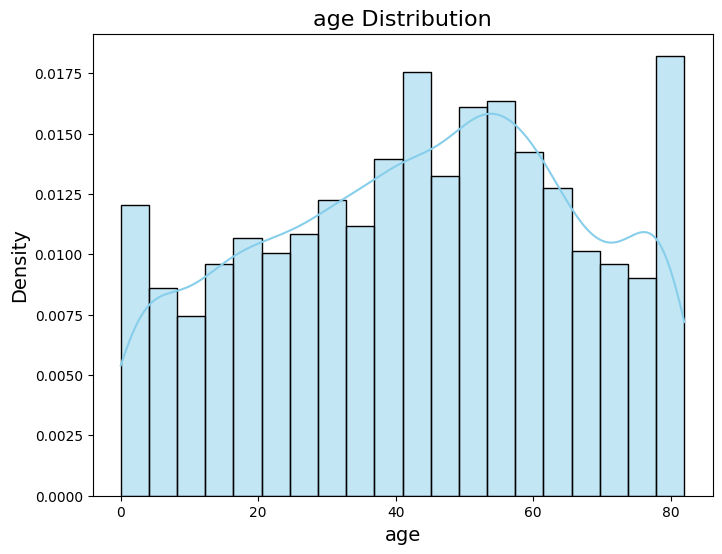

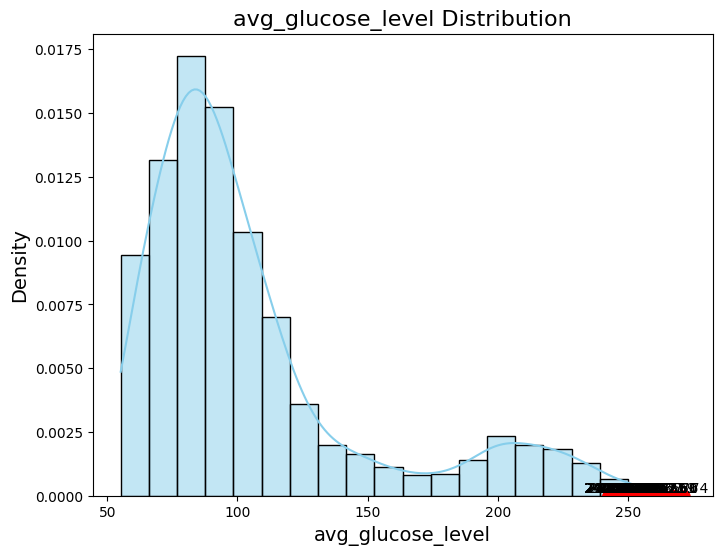

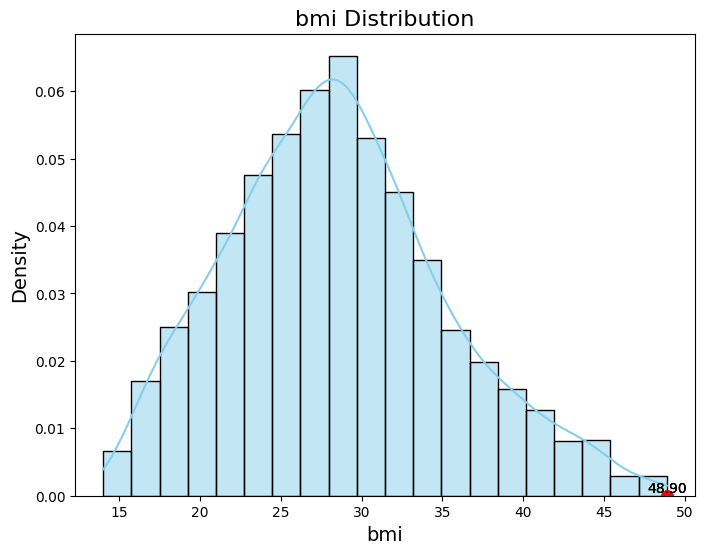

Outliers for 'age': []
Outliers for 'avg_glucose_level': [252.72, 243.58, 259.63, 249.31, 263.32, 271.74, 242.52, 250.89, 247.51, 243.53, 242.3, 243.5, 251.6, 247.69, 250.2, 254.6, 254.63, 246.34, 251.46, 267.76, 246.53, 244.28, 251.99, 253.16, 242.84, 249.29, 242.94, 247.48, 266.59, 243.59, 250.8, 255.17, 267.61, 248.37, 263.56, 247.97, 248.24, 254.95, 247.87, 261.67, 256.74, 244.3, 242.62, 243.52, 267.6, 253.86, 243.73, 260.85, 253.93]
Outliers for 'bmi': [48.9, 48.9, 48.9]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

outliers_age = []
outliers_glucose_level = []
outliers_bmi = []

numerical_variables = ['age', 'avg_glucose_level', 'bmi']


def detect_outliers_zscore(data):
    z_scores = (data - data.mean()) / data.std()
    return np.abs(z_scores) > 3

outliers = stroke[numerical_variables].apply(detect_outliers_zscore)

for variable in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(stroke[variable], bins=20, kde=True, color='skyblue', stat='density')
    plt.title(f'{variable} Distribution', fontsize=16)
    plt.xlabel(variable, fontsize=14)
    plt.ylabel('Density', fontsize=14)

    outliers_variable = stroke[variable][outliers[variable]]
    if not outliers_variable.empty:
        plt.plot(outliers_variable, np.zeros_like(outliers_variable), 'ro', markersize=8)
        if variable == 'age':
            outliers_age.extend(outliers_variable.tolist())
        elif variable == 'avg_glucose_level':
            outliers_glucose_level.extend(outliers_variable.tolist())
        elif variable == 'bmi':
            outliers_bmi.extend(outliers_variable.tolist())


        for x, y in zip(outliers_variable, np.zeros_like(outliers_variable)):
            plt.text(x, y, f'{x:.2f}', ha='center', va='bottom', fontsize=10, color='black')

    plt.show()


print("Outliers for 'age':", outliers_age)
print("Outliers for 'avg_glucose_level':", outliers_glucose_level)
print("Outliers for 'bmi':", outliers_bmi)

In [ ]:
stroke.shape

(4978, 11)

In [ ]:

for outlier_value in outliers_glucose_level:
    for index, value in stroke['avg_glucose_level'].items():
        if value == outlier_value:
            stroke.drop(index, inplace=True)


print("Number of rows in cleaned stroke dataset:", len(stroke))


Number of rows in cleaned stroke dataset: 4929


In [ ]:

for outlier_value in outliers_bmi:
    for index, value in stroke['bmi'].items():
        if value == outlier_value:
            stroke.drop(index, inplace=True)


print("Number of rows in cleaned stroke dataset:", len(stroke))

Number of rows in cleaned stroke dataset: 4926


In [ ]:
import pandas as pd
import numpy as np

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

stroke['bmi_category'] = stroke['bmi'].apply(categorize_bmi)


def categorize_age(age):
    if age < 18:
        return 'Children'
    elif 18 <= age < 35:
        return 'Young Adults'
    elif 35 <= age < 65:
        return 'Adults'
    else:
        return 'Seniors'

stroke['age_group'] = stroke['age'].apply(categorize_age)


glucose_bins = [0, 70, 100, 125, float('inf')]
glucose_labels = ['Low', 'Normal', 'High', 'Very High']
stroke['glucose_level_range'] = pd.cut(stroke['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels)


stroke['age_bmi_interaction'] = stroke['age'] * stroke['bmi']


stroke['health_risk_score'] = stroke['hypertension'] + stroke['heart_disease'] + (stroke['avg_glucose_level'] / 100) + (stroke['bmi'] / 25)


stroke['log_avg_glucose_level'] = np.log(stroke['avg_glucose_level'])


stroke['age_squared'] = stroke['age'] ** 2


stroke.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,age_group,glucose_level_range,age_bmi_interaction,health_risk_score,log_avg_glucose_level,age_squared
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese,Seniors,Very High,2452.2,4.7509,5.432367,4489
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese,Seniors,High,2600.0,3.3592,4.662684,6400
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese,Adults,Very High,1685.6,3.0883,5.143008,2401
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal Weight,Seniors,Very High,1896.0,3.7012,5.159745,6241
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Overweight,Seniors,Very High,2349.0,3.0221,5.226875,6561


In [ ]:
pip install matplotlib

In [ ]:
print("Shape of the dataset before removing rows containing Null values: ", stroke.shape)
stroke.isnull().sum()


Shape of the dataset before removing rows containing Null values:  (4926, 18)


gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status           0
stroke                   0
bmi_category             0
age_group                0
glucose_level_range      0
age_bmi_interaction      0
health_risk_score        0
log_avg_glucose_level    0
age_squared              0
dtype: int64

In [ ]:
#Encoding data
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

one_hot_encoded_data = pd.get_dummies(stroke, columns = [ 'work_type', 'smoking_status'])
X = one_hot_encoded_data

X["gender"] = enc.fit_transform(stroke['gender'])
X["ever_married"] = enc.fit_transform(stroke["ever_married"])
X["Residence_type"] = enc.fit_transform(stroke["Residence_type"])
X["bmi_category"] = enc.fit_transform(stroke["bmi_category"])
X["age_group"] = enc.fit_transform(stroke["age_group"])
X["glucose_level_range"] = enc.fit_transform(stroke["glucose_level_range"])


<Axes: >

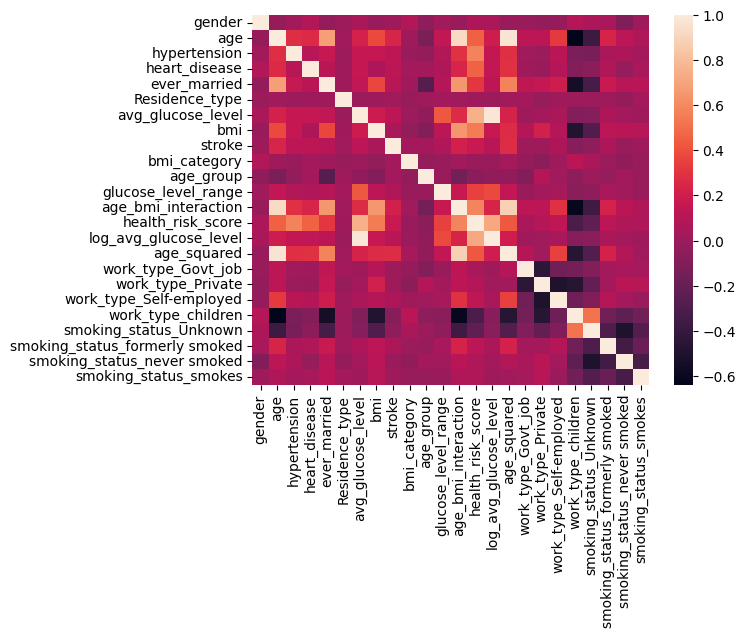

In [ ]:
import seaborn as sns
co = X.corr()
sns.heatmap(co)

Count of "yes": 238
Count of "no": 4688


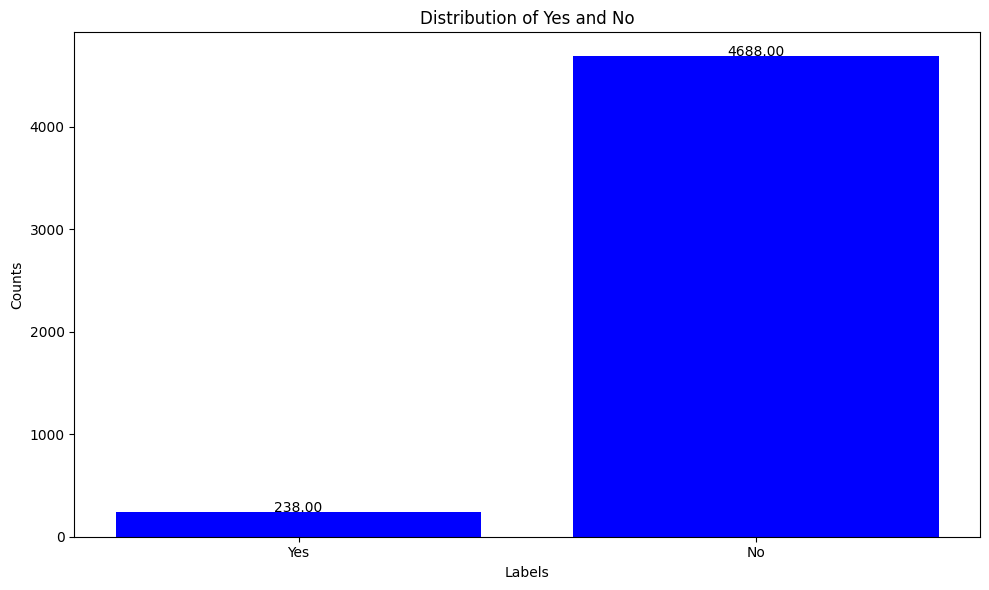

In [ ]:

yes_count = X['stroke'].eq(1).sum()
no_count = X['stroke'].eq(0).sum()

print(f'Count of "yes": {yes_count}')
print(f'Count of "no": {no_count}')

import matplotlib.pyplot as plt

labels = ["Yes","No"]
counts = [yes_count, no_count]


plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='blue')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Yes and No')

# Display the accuracy values on top of the bars
for i, value in enumerate(counts):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
Y = pd.DataFrame(X['stroke'])
Y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
4976,0
4977,0
4978,0
4979,0


In [ ]:
X.drop('stroke', axis = 1, inplace = True)
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,bmi_category,age_group,...,log_avg_glucose_level,age_squared,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.69,36.6,1,2,...,5.432367,4489,False,True,False,False,False,True,False,False
1,1,80,0,1,1,0,105.92,32.5,1,2,...,4.662684,6400,False,True,False,False,False,False,True,False
2,0,49,0,0,1,1,171.23,34.4,1,0,...,5.143008,2401,False,True,False,False,False,False,False,True
3,0,79,1,0,1,0,174.12,24.0,0,2,...,5.159745,6241,False,False,True,False,False,False,True,False
4,1,81,0,0,1,1,186.21,29.0,2,2,...,5.226875,6561,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41,0,0,0,0,70.15,29.8,2,0,...,4.250636,1681,False,True,False,False,False,True,False,False
4977,1,40,0,0,1,1,191.15,31.1,1,0,...,5.253058,1600,False,True,False,False,False,False,False,True
4978,0,45,1,0,1,0,95.02,31.8,1,0,...,4.554087,2025,True,False,False,False,False,False,False,True
4979,1,40,0,0,1,0,83.94,30.0,1,0,...,4.430102,1600,False,True,False,False,False,False,False,True


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Define the target variable y
y = stroke['stroke']  # Replace 'stroke' with your actual target variable name

# Features provided
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type',
                        'bmi_category', 'age_group', 'work_type_Govt_job', 'work_type_Private',
                        'work_type_Self-employed', 'work_type_children', 'smoking_status_Unknown',
                        'smoking_status_formerly smoked', 'smoking_status_never smoked',
                        'smoking_status_smokes']

numerical_features = ['age', 'avg_glucose_level', 'bmi', 'log_avg_glucose_level', 'age_squared']

# Select top 10 categorical features using chi-square
k_best_categorical = SelectKBest(score_func=chi2, k=10)
X_cat_selected = k_best_categorical.fit_transform(X[categorical_features], y)

# Select top 5 numerical features using mutual information
k_best_numerical = SelectKBest(score_func=mutual_info_classif, k=5)
X_num_selected = k_best_numerical.fit_transform(X[numerical_features], y)

# Get selected feature names
selected_categorical_feature_names = X[categorical_features].columns[k_best_categorical.get_support(indices=True)]
selected_numerical_feature_names = X[numerical_features].columns[k_best_numerical.get_support(indices=True)]

print("Selected Categorical Features:")
print(selected_categorical_feature_names)

print("\nSelected Numerical Features:")
print(selected_numerical_feature_names)
X.head()

Selected Categorical Features:
Index(['hypertension', 'heart_disease', 'ever_married', 'Residence_type',
       'bmi_category', 'age_group', 'work_type_Self-employed',
       'work_type_children', 'smoking_status_Unknown',
       'smoking_status_formerly smoked'],
      dtype='object')

Selected Numerical Features:
Index(['age', 'avg_glucose_level', 'bmi', 'log_avg_glucose_level',
       'age_squared'],
      dtype='object')


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,bmi_category,age_group,...,log_avg_glucose_level,age_squared,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.69,36.6,1,2,...,5.432367,4489,False,True,False,False,False,True,False,False
1,1,80,0,1,1,0,105.92,32.5,1,2,...,4.662684,6400,False,True,False,False,False,False,True,False
2,0,49,0,0,1,1,171.23,34.4,1,0,...,5.143008,2401,False,True,False,False,False,False,False,True
3,0,79,1,0,1,0,174.12,24.0,0,2,...,5.159745,6241,False,False,True,False,False,False,True,False
4,1,81,0,0,1,1,186.21,29.0,2,2,...,5.226875,6561,False,True,False,False,False,True,False,False


In [ ]:
X.drop(['gender', 'hypertension', 'bmi_category', 'work_type_Govt_job', 'work_type_Private',
        'smoking_status_never smoked', 'smoking_status_smokes'], axis=1, inplace=True)
X

,age,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_group,glucose_level_range,age_bmi_interaction,health_risk_score,log_avg_glucose_level,age_squared,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked
0,67,1,1,1,228.69,36.6,2,3,2452.2,4.7509,5.432367,4489,False,False,False,True
1,80,1,1,0,105.92,32.5,2,0,2600.0,3.3592,4.662684,6400,False,False,False,False
2,49,0,1,1,171.23,34.4,0,3,1685.6,3.0883,5.143008,2401,False,False,False,False
3,79,0,1,0,174.12,24.0,2,3,1896.0,3.7012,5.159745,6241,True,False,False,False
4,81,0,1,1,186.21,29.0,2,3,2349.0,3.0221,5.226875,6561,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41,0,0,0,70.15,29.8,0,2,1221.8,1.8935,4.250636,1681,False,False,False,True
4977,40,0,1,1,191.15,31.1,0,3,1244.0,3.1555,5.253058,1600,False,False,False,False
4978,45,0,1,0,95.02,31.8,0,2,1431.0,3.2222,4.554087,2025,False,False,False,False
4979,40,0,1,0,83.94,30.0,0,2,1200.0,2.0394,4.430102,1600,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.30)

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled

KNN classifier

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy: 0.95





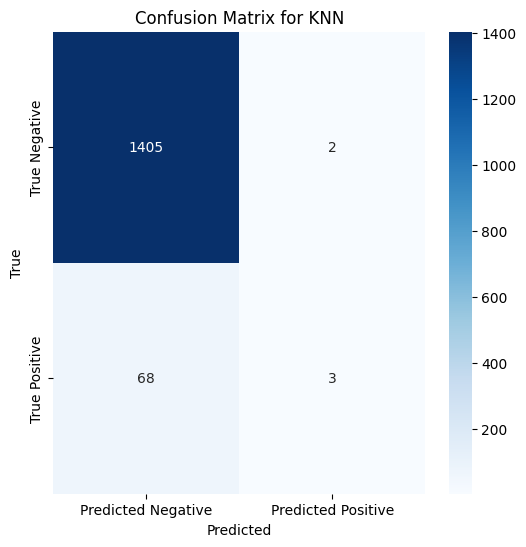

Precision: 0.6
Recall: 0.04225352112676056


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = knn.score(X_test, y_test)
print("KNN Accuracy: {:.2f}".format(knn_accuracy))
print("\n\n")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, knn_predictions)
recall = recall_score(y_test, knn_predictions)

print("Precision:", precision)
print("Recall:", recall)

Logistic Regression Accuracy: 0.9519621109607578





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


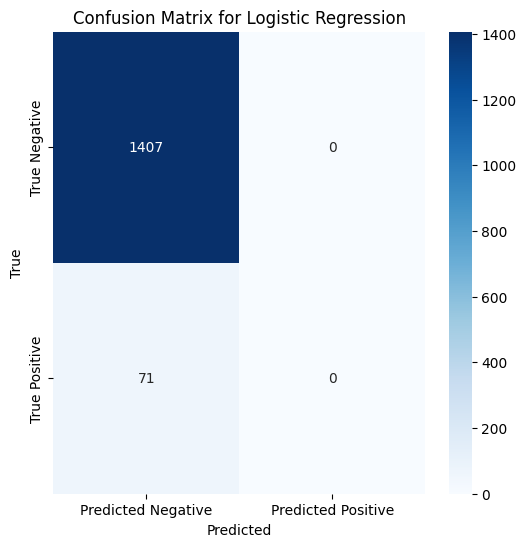

Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print( "Logistic Regression Accuracy:", logistic_regression_accuracy)

# print("Similarity between KNN and Logistic Regression:")
# print(accuracy_score(knn_predictions , predictions))
print("\n\n")

cm = confusion_matrix(y_test, logistic_regression_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, logistic_regression_predictions)
recall = recall_score(y_test, logistic_regression_predictions)

print("Precision:", precision)
print("Recall:", recall)

Decision Tree Accuracy: 0.9073071718538566


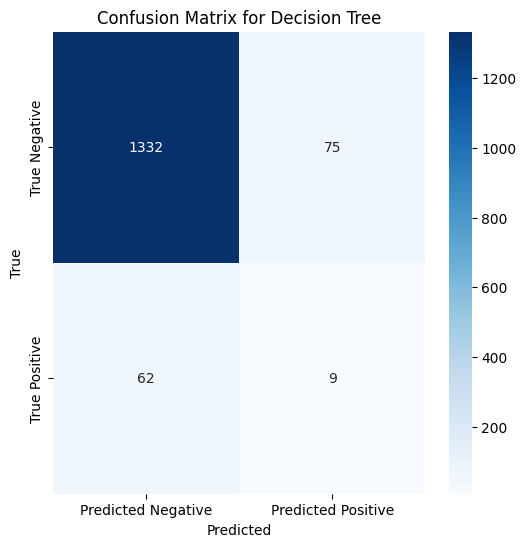

Precision: 0.10714285714285714
Recall: 0.1267605633802817


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

decision_tree_predictions = decision_tree.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print("Decision Tree Accuracy:", decision_tree_accuracy)

cm = confusion_matrix(y_test, decision_tree_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, decision_tree_predictions)
recall = recall_score(y_test, decision_tree_predictions)

print("Precision:", precision)
print("Recall:", recall)

<ipython-input-267-889ddb2f143f>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Random Forest Accuracy: 0.9512855209742895





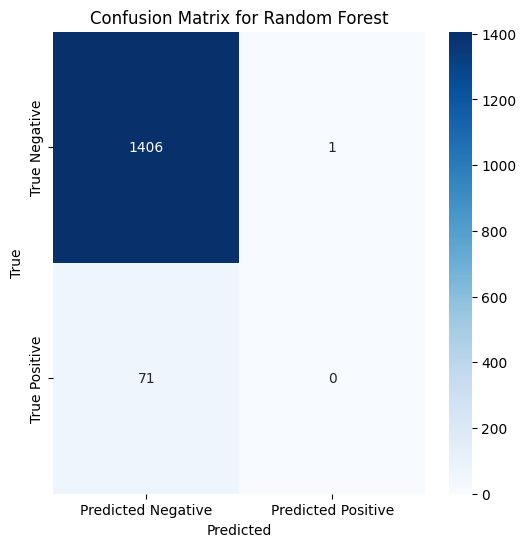

Precision: 0.0
Recall: 0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("\n\n")

# Generate confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Calculate precision and recall
precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)

print("Precision:", precision)
print("Recall:", recall)


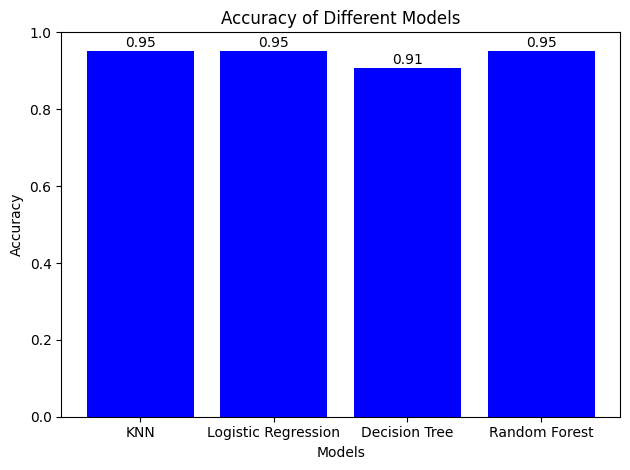

In [ ]:
model_names = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_values = [knn_accuracy , logistic_regression_accuracy, decision_tree_accuracy, rf_accuracy]

plt.bar(model_names, accuracy_values, color='blue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Display the accuracy values on top of the bars
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center')

# Show the plot
plt.tight_layout()
plt.show()
